In [108]:
import numpy as np
import pandas as pd
from scipy.io import arff
from scipy import linalg 
import matplotlib.pyplot as plt

In [131]:
# Step1 - Read the arff files and store the values in a matrix (X)
def separate_labels(data, val_cols, label_cols):
    data = np.array([[col for col in row] for row in data])
    labels = data[:, label_cols]
    values = data[:, val_cols]
    return values, labels

iris_data, iris_meta = arff.loadarff('./datasets/iris.arff')
col_size = len(iris_data[0])
X, labels_true = separate_labels(iris_data, range(0, col_size - 1), col_size - 1)
X = X.astype('float')
labels_unique = np.unique(labels_true)

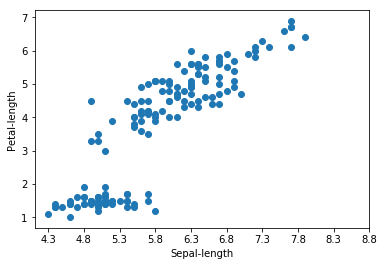

In [132]:
# Step2 - Plot the original dataset
sepallength = X[:,0]
petallength = X[:,2]
plt.scatter(sepallength, petallength)
plt.xlabel("Sepal-length")
plt.ylabel("Petal-length")
plt.xticks(np.arange(min(sepallength), max(sepallength)+1, 0.5))
plt.yticks(np.arange(min(petallength), max(petallength)+1, 1.0))
plt.show()

In [133]:
# Step3 - Compute the d-dimensional mean vector
d_mean = np.mean(X, axis=0)

In [134]:
# Step4 - Compute the covariance matrix of the whole dataset
X_cov = np.cov(X)

In [135]:
# Step5 - Calculate the eigenvectors and their corresponding eigenvalues of the covariance matrix
e_vals, e_vecs = linalg.eig(X_cov)

In [136]:
# Step6 - Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the
# largest eigenvalues to form a new d x k dimensional matrix (where every column
# represents an eigenvector). Write the sorted eigenvectors and eigenvalues in console. 
ind = np.argsort(-e_vals) # The array is negated to sort descendingly
k = 100
e_vecs_k = e_vecs[ind[0:k], :]
e_vals_k = e_vals[0:100]
e_vals_k = [[v] for v in e_vals_k]
e_vals_vec_d_k = np.append(e_vals_k, e_vecs_k, axis=1).transpose()
pd.DataFrame(data=e_vals_vec_d_k)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,(559.82062137+0j),(96.5284922257+0j),(1.48588640461+0j),(5.24354546094e-14+0j),(-3.61084354744e-14+3.2867777881e-14j),(-3.61084354744e-14-3.2867777881e-14j),(-3.68247521235e-14+0j),(2.34642631967e-14+2.93894661939e-14j),(2.34642631967e-14-2.93894661939e-14j),(2.57374987253e-14+2.06829182567e-14j),...,(-3.93403096511e-15+4.58321390601e-15j),(-3.93403096511e-15-4.58321390601e-15j),(6.40863506474e-15+1.25555384291e-15j),(6.40863506474e-15-1.25555384291e-15j),(6.44752485289e-15+0j),(-1.71441457526e-15+5.18569040502e-15j),(-1.71441457526e-15-5.18569040502e-15j),(-5.18633317989e-15+1.52079943214e-15j),(-5.18633317989e-15-1.52079943214e-15j),(-3.90408710878e-15+3.21917475399e-15j)
1,(0.0770890689339+0j),(0.0753168329273+0j),(0.0708954237984+0j),(0.0700116985431+0j),(0.0754329871135+0j),(0.0768886925168+0j),(0.0818840844373+0j),(0.0759478914902+0j),(0.0669569870907+0j),(0.0791710474041+0j),...,(0.073950915459+0j),(0.0720944572215+0j),(0.0798871084061+0j),(0.0785727010049+0j),(0.0797960980355+0j),(0.088361105785+0j),(0.0825043495728+0j),(0.0831354081358+0j),(0.0704703073567+0j),(0.0778893521666+0j)
2,(-0.121421472891+0j),(-0.0999173309429+0j),(-0.110381755372+0j),(-0.0971492296059+0j),(-0.120830759985+0j),(-0.100259053194+0j),(-0.127656539884+0j),(-0.112402884745+0j),(-0.0917538661739+0j),(-0.118296229487+0j),...,(0.0325160781346+0j),(0.0542692107377+0j),(0.0172624229955+0j),(0.0218180828668+0j),(0.0842166477429+0j),(0.0598516728612+0j),(0.0698954277609+0j),(0.0574098739588+0j),(0.034195485256+0j),(0.013888188936+0j)
3,(-0.00161714435753+0j),(-0.0813131916433+0j),(-0.00954863985415+0j),(0.0327672776945+0j),(-0.0266476828853+0j),(-0.00898963188521+0j),(0.00373263130343+0j),(0.018249954499+0j),(0.00515501933102+0j),(-0.0487238295982+0j),...,(0.133365808034+0j),(0.100962781979+0j),(0.118848484839+0j),(0.0689737437728+0j),(-0.0226992227431+0j),(0.0625329361933+0j),(-0.134570644225+0j),(-0.0350074980822+0j),(0.177890773439+0j),(0.118662148849+0j)
4,(-0.0298744925544+0j),(0.0139662048923+0j),(0.0728412827147+0j),(0.11073628332+0j),(-0.0259502576231+0j),(-0.109072153599+0j),(0.0322430527467+0j),(0.150652812229+0j),(0.0637544922219+0j),(0.135198637936+0j),...,(0.00661218006564+0j),(0.0334954408967+0j),(-0.0321096765122+0j),(0.0623066085606+0j),(-0.107763541314+0j),(0.0657556702608+0j),(-0.0574615895688+0j),(-0.0645142078133+0j),(0.037991699131+0j),(0.0762726378965+0j)
5,(0.0370259055796-0.00805677509166j),(-0.0207715450532-0.068470923193j),(0.0853731112152+0.0196389238079j),(0.0942629189112+0.0854984608026j),(-0.0841817700089+0.0527830976379j),(0.0320843743715+0.0698494489389j),(0.0133689291889-0.0632974983349j),(-0.0774590960085-0.0769600719544j),(0.107370825987+0.0602474179645j),(0.0976103748615+0.0197885183725j),...,(0.000708002009328+0.026780573055j),(-0.0713134911724-0.0181329047877j),(0.0550609376918-0.0194834630617j),(0.154769812843+0.0484773394646j),(0.0304366626051-0.0464844049353j),(0.0185134419167+0.0277806905187j),(0.022670179852+0.000821349522846j),(-0.146319593576-0.0513855432903j),(0.10422778315+0.0851005011905j),(-0.0418346416064+0.000815675101018j)
6,(0.0370259055796+0.00805677509166j),(-0.0207715450532+0.068470923193j),(0.0853731112152-0.0196389238079j),(0.0942629189112-0.0854984608026j),(-0.0841817700089-0.0527830976379j),(0.0320843743715-0.0698494489389j),(0.0133689291889+0.0632974983349j),(-0.0774590960085+0.0769600719544j),(0.107370825987-0.0602474179645j),(0.0976103748615-0.0197885183725j),...,(0.000708002009328-0.026780573055j),(-0.0713134911724+0.0181329047877j),(0.0550609376918+0.0194834630617j),(0.154769812843-0.0484773394646j),(0.0304366626051+0.0464844049353j),(0.0185134419167-0.0277806905187j),(0.022670179852-0.000821349522846j),(-0.146319593576+0.0513855432903j),(0.10422778315-0.0851005011905j),(-0.0418346416064-0.000815675101018j)
7,(0.0546122938775+0j),(0.0226226239532+0j),(0.0425595466801+0j),(-0.0897224936756+0j),(0.124924593874+0j),(-0.0228300368335+0j

In [146]:
# Step7 - Derive the new data set. Use this d x k eigenvector matrix to transform the samples
# onto the new subspace.
e_vec_d_k = e_vals_vec_d_k[1:,:]
X_centered = (X - d_mean)/np.std(X)
X_proj = np.dot(X_centered.transpose(), e_vec_d_k)

/Users/jnalexander/Projects/IML_practical_1/lib/python2.7/site-packages/matplotlib/ticker.py:759: ComplexWarning: Casting complex values to real discards the imaginary part
  loc_range_oom = int(math.floor(math.log10(loc_range)))
/Users/jnalexander/Projects/IML_practical_1/lib/python2.7/site-packages/matplotlib/ticker.py:783: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.format % xp
/Users/jnalexander/Projects/IML_practical_1/lib/python2.7/site-packages/matplotlib/text.py:893: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Users/jnalexander/Projects/IML_practical_1/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/jnalexander/Projects/IML_practical_1/lib/python2.7/site-packages/matplotlib/text.py:761: ComplexWarning: Casting complex values

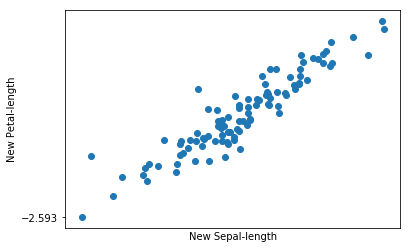

In [148]:
# Step 8 - Plot the new subspace (choose the largest eigenvectors to plot the matrix). 
sepallength = X_proj[0,:]
petallength = X_proj[2,:]
plt.scatter(sepallength, petallength)
plt.xlabel("New Sepal-length")
plt.ylabel("New Petal-length")
plt.xticks(np.arange(min(sepallength), max(sepallength)+1, 0.5))
plt.yticks(np.arange(min(petallength), max(petallength)+1, 1.0))
plt.show()

In [ ]:
# Step 9 - Reconstruct the data set back to the original one. Additionally, plot the data set. 